## Load Libraries

In [1]:
# i am loading several libraries in anticipation of what i may need, it will probably be a overkill.
import os
# print the location of the directory
print(os.getcwd())
import sys
print(sys.version)
# To help with reading and manipulating data
import pandas as pd
import numpy as np
# To help with data visualization
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    confusion_matrix,
    mean_squared_error
)
# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)
# To supress warnings
import warnings
import statsmodels
warnings.filterwarnings("ignore")

C:\Users\Frederick Duff\Desktop\MIT-Data-Engineering\ChurnProject
3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]


In [2]:
# printing the versions of the libraries used for this notebook.
print('Numpy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('Seaborn version:',sns.__version__)
print('Sklearn version:',sklearn.__version__)
print('Statsmodels version:',statsmodels.__version__)
print('Matplotlib version:',matplotlib.__version__)


Numpy version: 1.24.3
Pandas version: 1.5.3
Seaborn version: 0.12.2
Sklearn version: 1.3.2
Statsmodels version: 0.14.0
Matplotlib version: 3.7.2


In [3]:
# read the dataset
df = pd.read_csv("customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


In [4]:
# make a copy of the data
data = df.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe(include ='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.000,NaN,NaN,NaN,0.162,0.369,0.000,0.000,0.000,0.000,1.000
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.000,NaN,NaN,NaN,32.371,24.559,0.000,9.000,29.000,55.000,72.000
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
# printing all columns
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<h2 style="color:BLUE;"> 1. Data Manipulation  </h2>

In [10]:
# 1a. Extract the 5th column and store it in 'customer_5'
customer_5 = df.iloc[:,4]
customer_5.head()

0    No
1    No
2    No
3    No
4    No
Name: Dependents, dtype: object

In [11]:
# 1b. Extract the 15th column and store it in 'customer_15'
customer_15 = df.iloc[:,14]
customer_15.head()

0    No
1    No
2    No
3    No
4    No
Name: StreamingMovies, dtype: object

In [12]:
# 1c.Extract all the male senior citizens whos payment method is electronic check and store the result in 'senior_male_electronic'
# Filtering the DataFrame
senior_male_electronic = df[(df['gender'] == 'Male') & 
                            (df['SeniorCitizen'] == 1) & 
                            (df['PaymentMethod'] == 'Electronic check')]

In [13]:
# Displaying the first few rows of the result
senior_male_electronic.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.650,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.450,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.450,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.750,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,74.700,74.7,No


In [14]:
# 1d. Extract all those customers whose tenure is greater than 70 months or their montly charges is more than $100 and store the result in 'customer_total_tenure'
customer_total_tenure = df[(df['tenure']> 70)| (df['MonthlyCharges']>100)]
customer_total_tenure.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.800,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.350,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.700,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.500,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.250,7895.15,No


In [15]:
# 1e. Extract all the customers whose contract is of two years , payment method is mailed check and the value of churn is 'Yes'
# and store the result in "two_mail_yes"

two_mail_yes = df[(df['Contract'] == 'Two year') & (df['PaymentMethod']=='Mailed check') & (df['Churn']=='Yes')]
two_mail_yes.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.350,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.500,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,Yes,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.500,4627.85,Yes


In [16]:
# 1f. Extract 333 random records from the customer_churn data frame and store the result in 'customer_333'
customer_333 = df.sample(n=333)
customer_333.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3786,0064-YIJGF,Male,0,Yes,Yes,27,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.750,1929,No
1840,6990-YNRIO,Male,0,Yes,Yes,65,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),108.650,6937.95,Yes
4636,1269-FOYWN,Male,0,Yes,Yes,44,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),20.000,860.85,No
74,5630-AHZIL,Female,0,No,Yes,3,Yes,No,DSL,Yes,No,No,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic),64.500,177.4,No
3051,5117-ZSMHQ,Female,0,Yes,Yes,71,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),89.900,6342.7,No


In [17]:
#1g. Get the count of different levels from the 'Churn' column
churn_lvls = df['Churn'].value_counts()
print(churn_lvls)

No     5174
Yes    1869
Name: Churn, dtype: int64


<h2 style="color:BLUE;"> 2. Data Visualization  </h2>

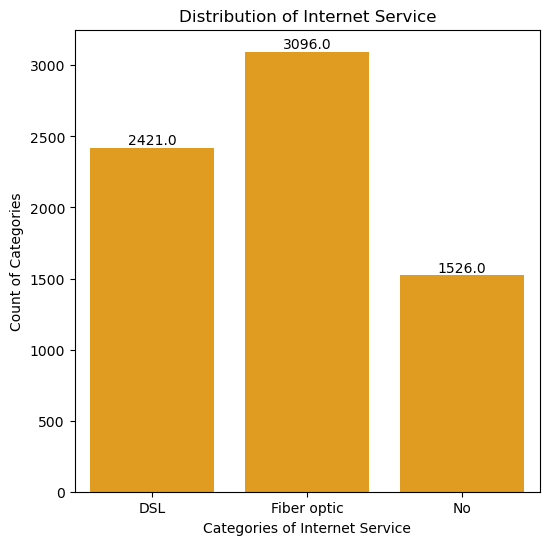

In [18]:
plt.figure(figsize=(6,6))
ax = sns.countplot(data=df, x='InternetService', color='orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')

# Add count above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


In [19]:
# DSL - 2421
# Fiber Optic - 3096
# no service - 1526

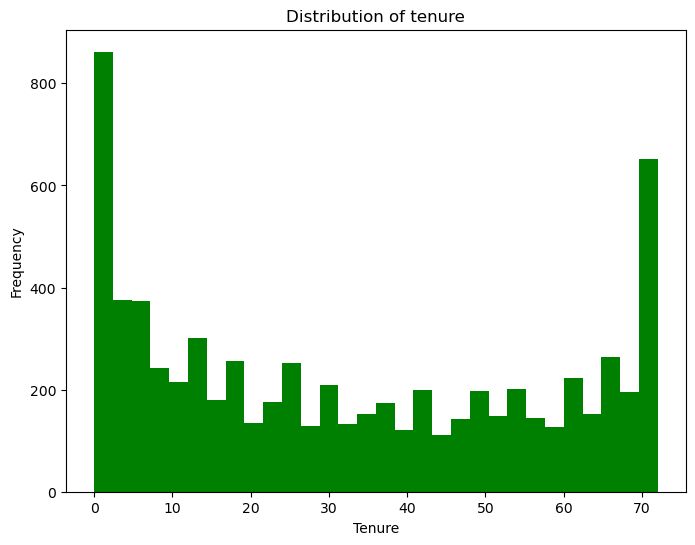

In [20]:
plt.figure(figsize=(8,6))
plt.hist(df['tenure'], bins=30, color='green')
plt.title('Distribution of tenure')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.show()


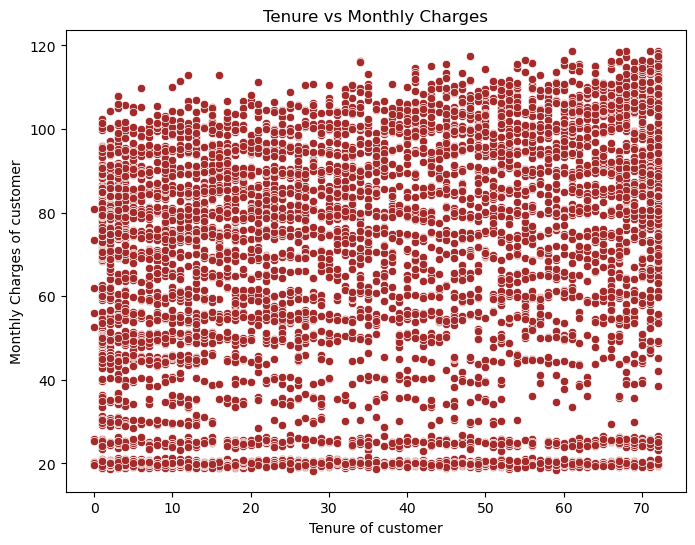

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', color='brown')
plt.xlabel('Tenure of customer')
plt.ylabel('Monthly Charges of customer')
plt.title('Tenure vs Monthly Charges')
plt.show()


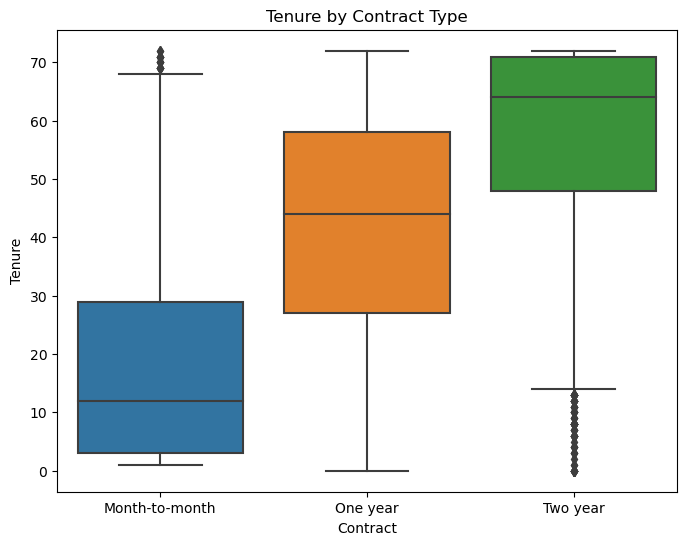

In [22]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Contract', y='tenure')
plt.xlabel('Contract')
plt.ylabel('Tenure')
plt.title('Tenure by Contract Type')
plt.show()


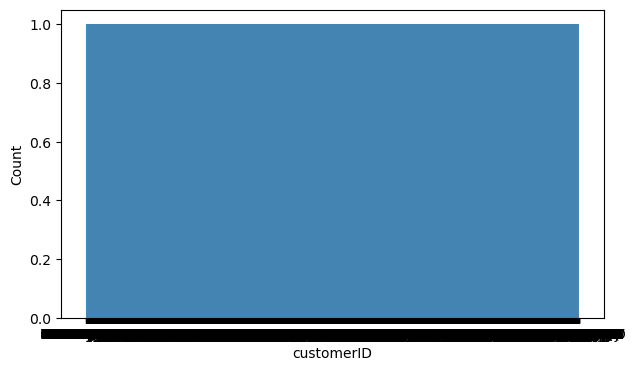

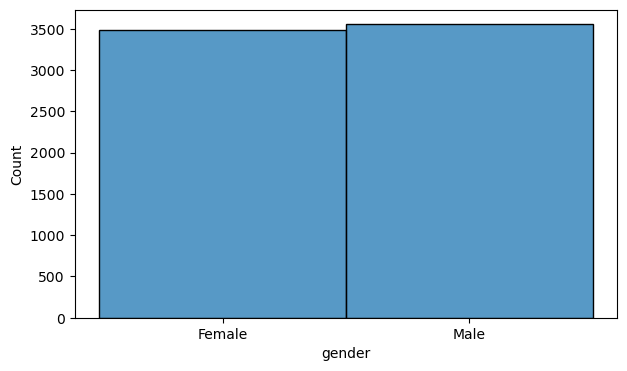

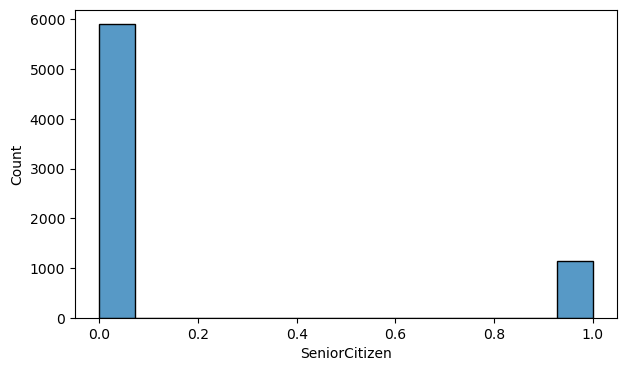

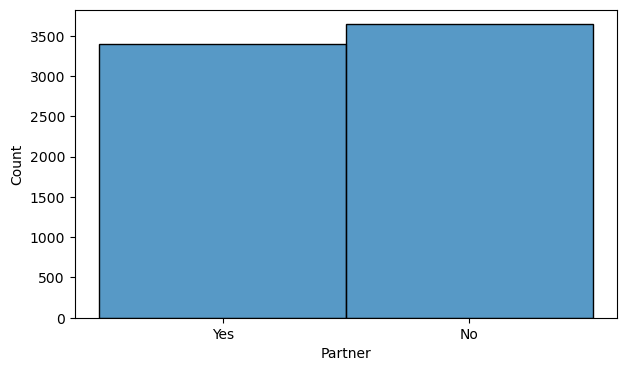

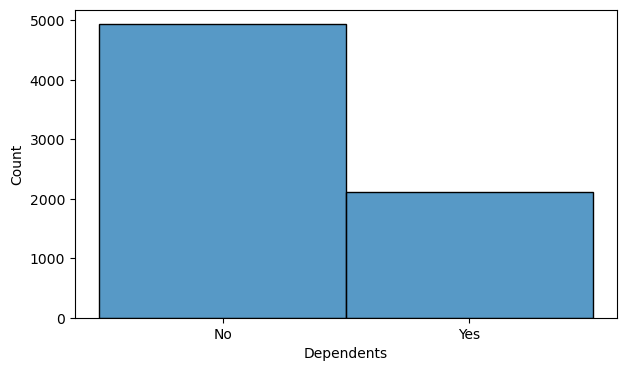

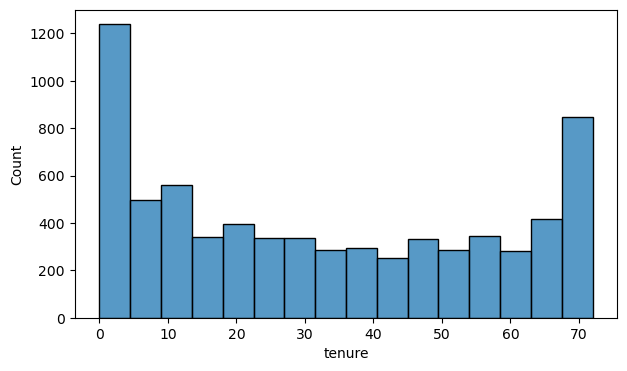

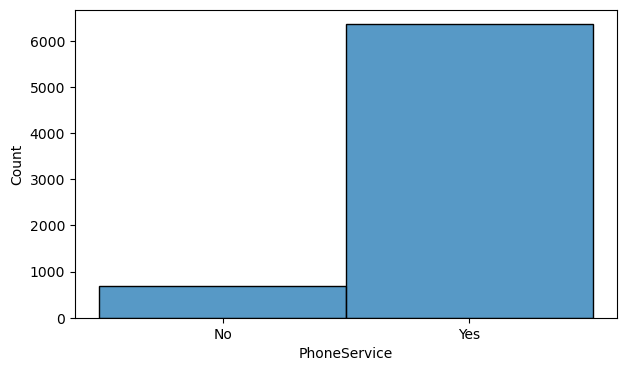

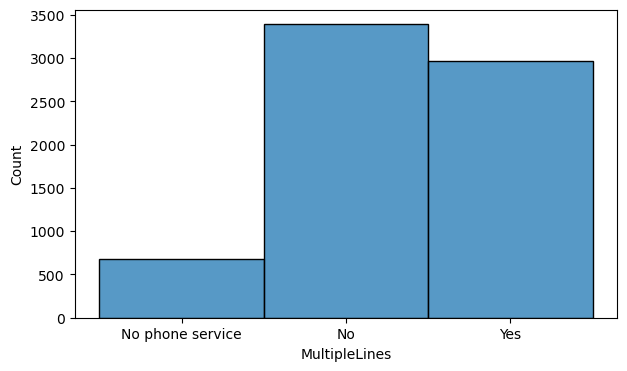

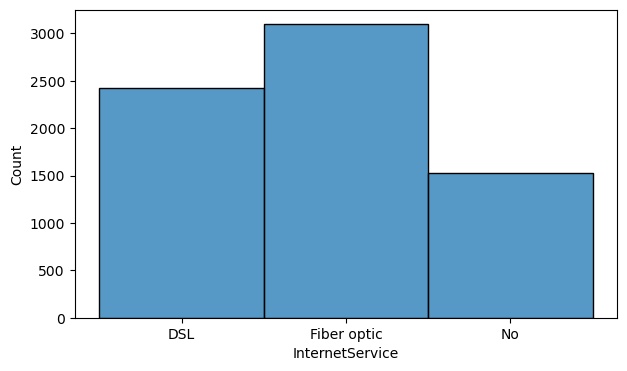

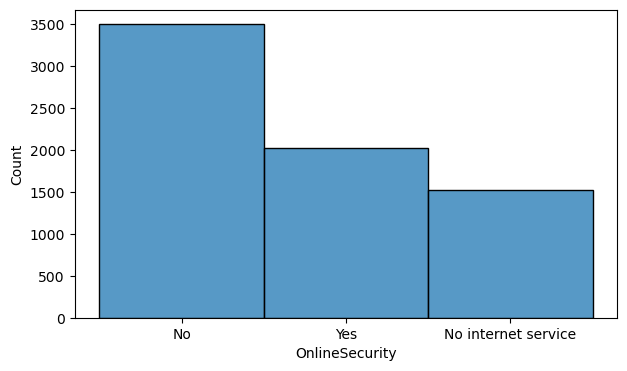

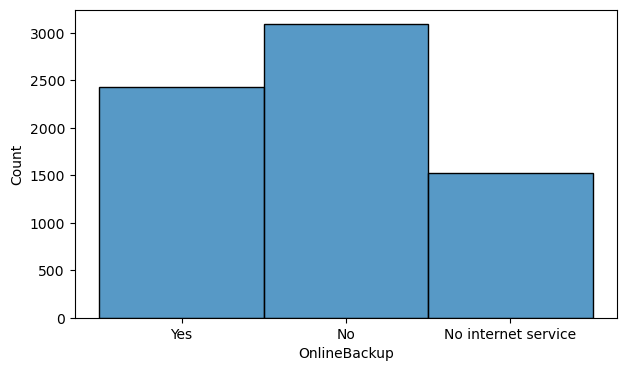

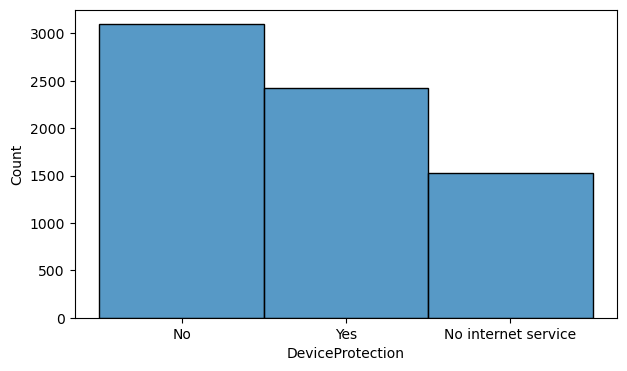

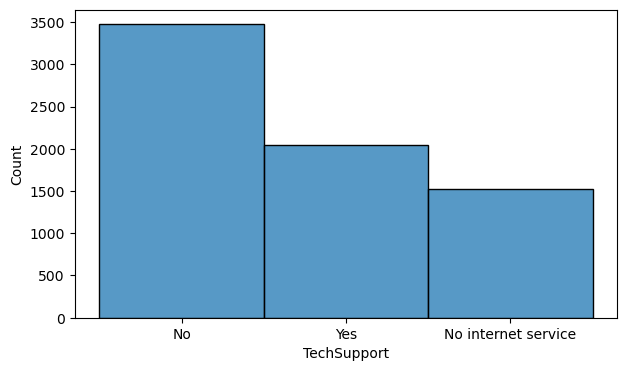

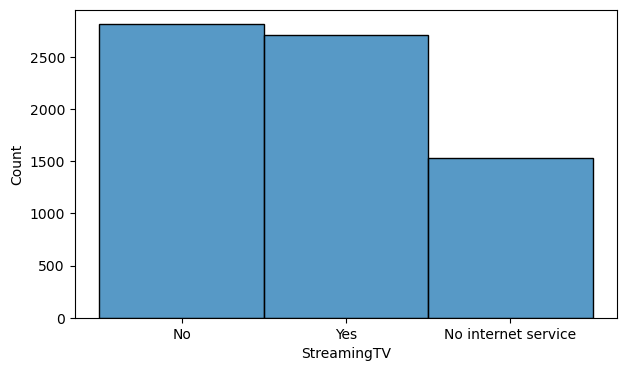

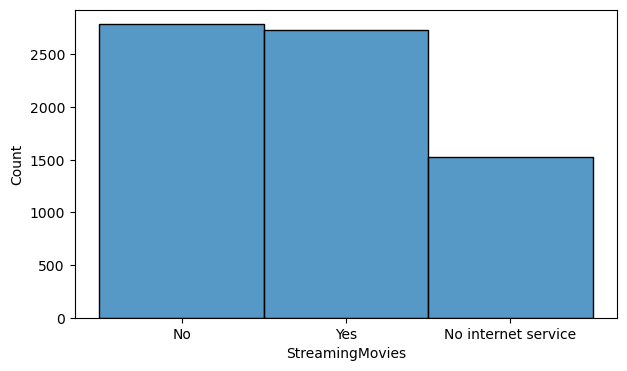

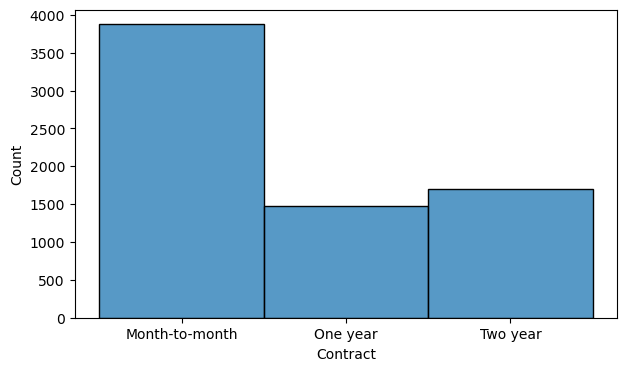

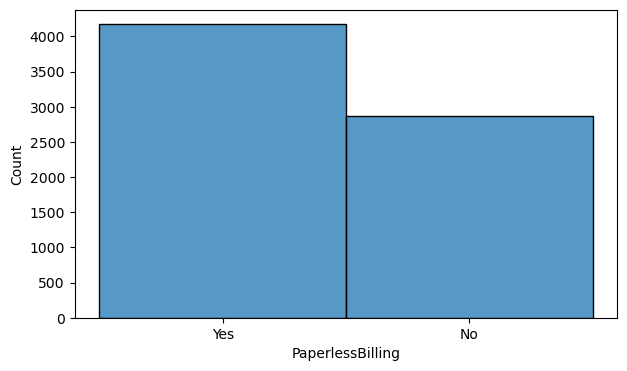

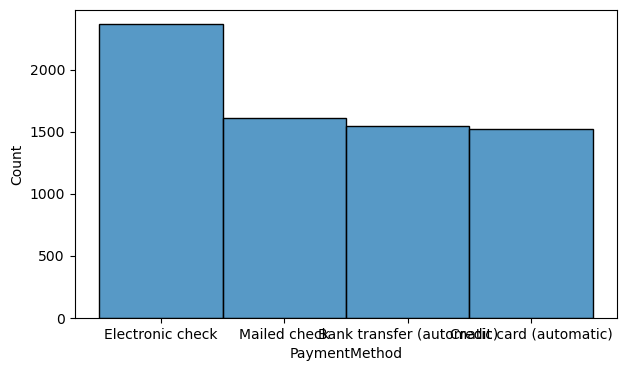

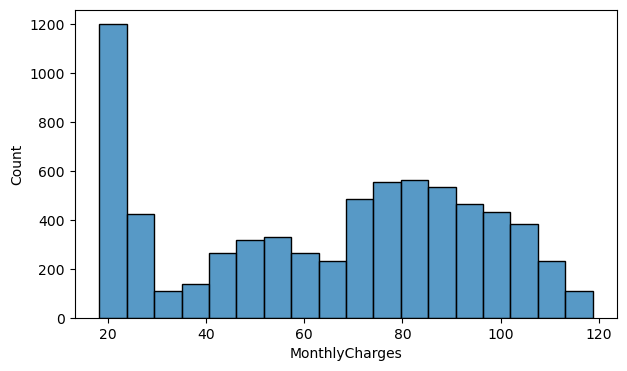

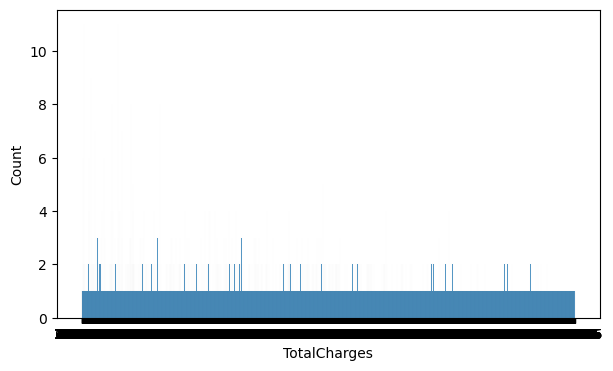

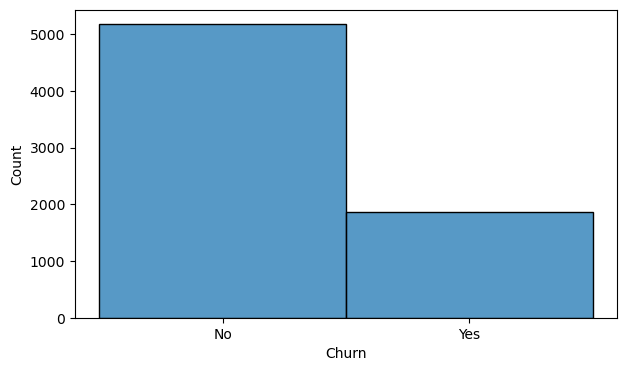

In [23]:
# let's plot all the columns in one place to look at their distributions

for i in df.columns:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=df, x=i)
    plt.show()

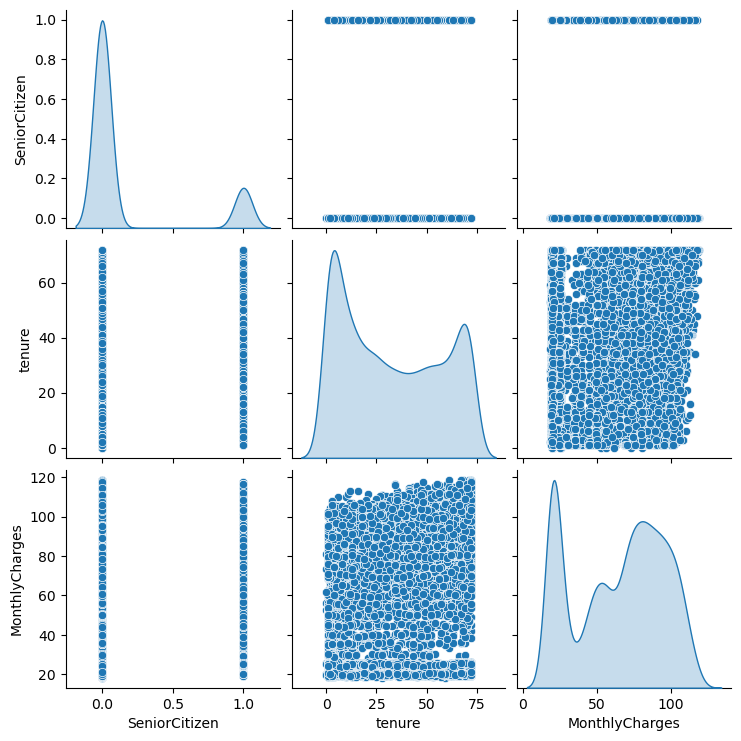

In [24]:
sns.pairplot(df, diag_kind="kde")

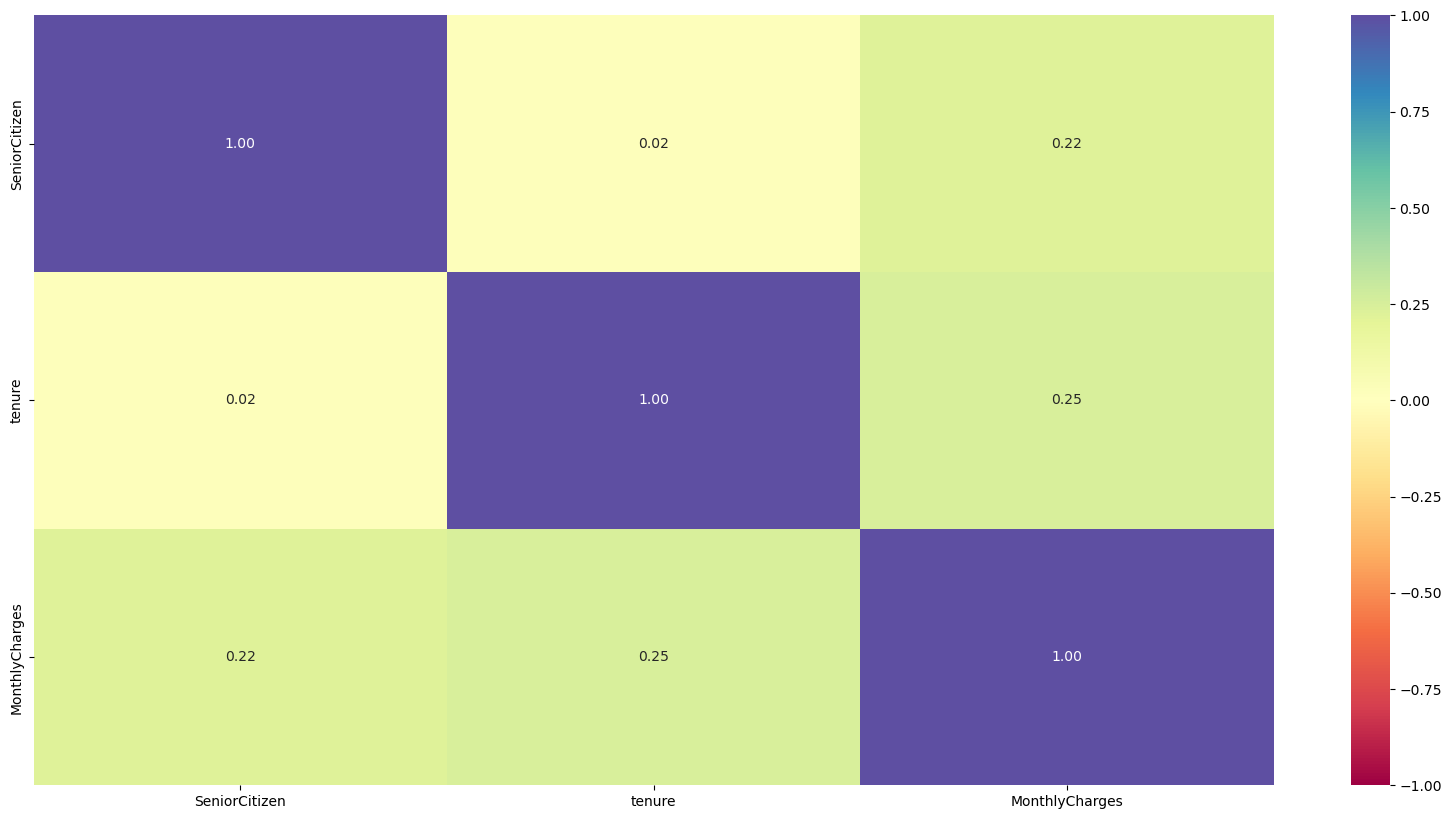

In [25]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

<h2 style="color:BLUE;"> 3. Linear Regression  </h2>

In [26]:
X = df[['tenure']]
y = df['MonthlyCharges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [27]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [28]:
y_line_pred = model.predict(X_test)


In [29]:
mse = mean_squared_error(y_test, y_line_pred)
lr_rmse = np.sqrt(mse)
print("Root Mean Square Error:", lr_rmse)


Root Mean Square Error: 29.07936015646814


In [30]:
error = y_test - y_line_pred


<h2 style="color:BLUE;"> 4. Logistic Regression  </h2>

In [31]:
X = df[['MonthlyCharges']]
y = df['Churn'].replace({'Yes': 1, 'No': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=2)


In [32]:
logmod = LogisticRegression()
logmod.fit(X_train, y_train)


LogisticRegression()

In [33]:
y_log_pred = logmod.predict(X_test)


In [34]:
print(confusion_matrix(y_test, y_log_pred))
print("Accuracy:", accuracy_score(y_test, y_log_pred))

[[1832    0]
 [ 634    0]]
Accuracy: 0.7429034874290349


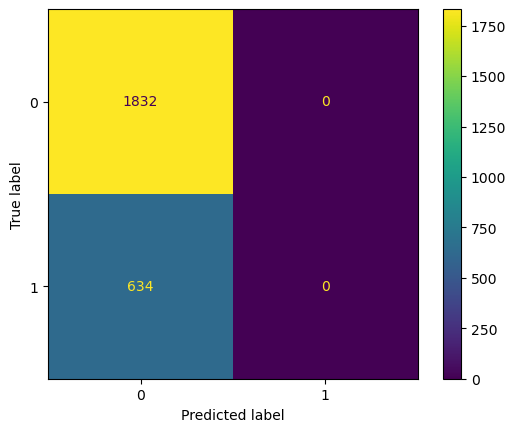

Accuracy: 0.7429034874290349
Recall: 0.0
Precision: 0.0
F1 Score: 0.0


In [35]:
# Visualizing the Confusion Matrix and the metrics

cm = confusion_matrix(y_test, y_log_pred)
ConfusionMatrixDisplay(cm, display_labels=logmod.classes_).plot(cmap='viridis') 
plt.show()


# Calculating metrics
log_accuracy = accuracy_score(y_test, y_log_pred)
log_recall = recall_score(y_test, y_log_pred)
log_precision = precision_score(y_test,y_log_pred)
log_f1 = f1_score(y_test, y_log_pred)

# Displaying the metrics
print("Accuracy:", log_accuracy)
print("Recall:", log_recall)
print("Precision:", log_precision)
print("F1 Score:", log_f1)

#### building a multiple logistic regression model

In [36]:
X = df[['tenure', 'MonthlyCharges']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)


In [37]:
logmod_mult = LogisticRegression()
logmod_mult.fit(X_train, y_train)


LogisticRegression()

In [38]:
y_pred_mult = logmod_mult.predict(X_test)

print(confusion_matrix(y_test, y_pred_mult))
print("Accuracy:", accuracy_score(y_test, y_pred_mult))


[[964  97]
 [197 151]]
Accuracy: 0.7913413768630234


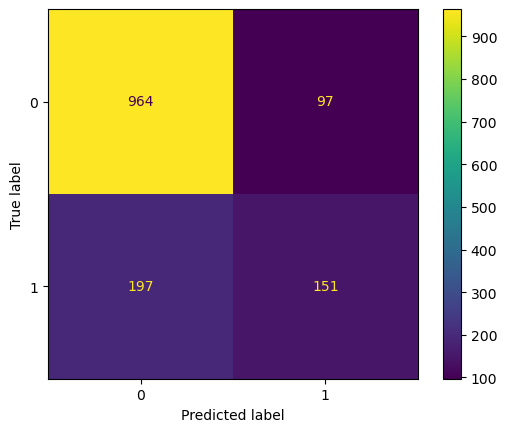

Accuracy: 0.7913413768630234
Recall: 0.4339080459770115
Precision: 0.6088709677419355
F1 Score: 0.5067114093959731


In [39]:
# Visualizing the Confusion Matrix and the metrics

cm = confusion_matrix(y_test, y_pred_mult)
ConfusionMatrixDisplay(cm, display_labels=logmod_mult.classes_).plot(cmap='viridis') 
plt.show()


# Calculating metrics
multi_log_accuracy = accuracy_score(y_test, y_pred_mult)
multi_log_recall = recall_score(y_test, y_pred_mult)
multi_log_precision = precision_score(y_test,y_pred_mult)
multi_log_f1 = f1_score(y_test, y_pred_mult)

# Displaying the metrics
print("Accuracy:", multi_log_accuracy)
print("Recall:", multi_log_recall)
print("Precision:", multi_log_precision)
print("F1 Score:", multi_log_f1)

<h2 style="color:BLUE;"> 5. Decision Tree  </h2>

In [40]:
X = df[['tenure']]
y = df['Churn'].replace({'Yes': 1, 'No': 0}) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)


In [41]:
dt_mod = DecisionTreeClassifier()
dt_mod.fit(X_train, y_train)


DecisionTreeClassifier()

In [42]:
y_dt_pred = dt_mod.predict(X_test)


In [43]:
print(confusion_matrix(y_test, y_dt_pred))
print("Accuracy:", accuracy_score(y_test, y_dt_pred))

[[965  96]
 [240 108]]
Accuracy: 0.7615330021291696


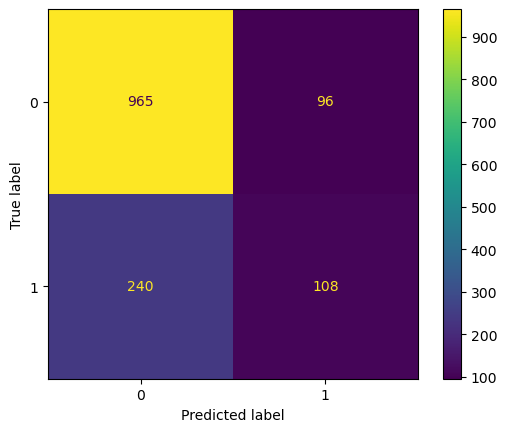

Accuracy: 0.7615330021291696
Recall: 0.3103448275862069
Precision: 0.5294117647058824
F1 Score: 0.391304347826087


In [44]:
# Visualizing the Confusion Matrix and the metrics

cm = confusion_matrix(y_test, y_dt_pred)
ConfusionMatrixDisplay(cm, display_labels=dt_mod.classes_).plot(cmap='viridis') 
plt.show()


# Calculating metrics
dt_accuracy = accuracy_score(y_test, y_dt_pred)
dt_recall = recall_score(y_test, y_dt_pred)
dt_precision = precision_score(y_test, y_dt_pred)
dt_f1 = f1_score(y_test, y_dt_pred)

# Displaying the metrics
print("Accuracy:",dt_accuracy)
print("Recall:", dt_recall)
print("Precision:", dt_precision)
print("F1 Score:", dt_f1)

<h2 style="color:BLUE;"> 6. Random Forest  </h2>

In [45]:
X = df[['tenure', 'MonthlyCharges']]
y = df['Churn'].replace({'Yes': 1, 'No': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2)

In [46]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


RandomForestClassifier()

In [47]:
y_rf_pred = rf_model.predict(X_test)


In [48]:
print(confusion_matrix(y_test, y_rf_pred))
print("Accuracy:", accuracy_score(y_test, y_rf_pred))

[[1359  210]
 [ 292  252]]
Accuracy: 0.7624230951254141


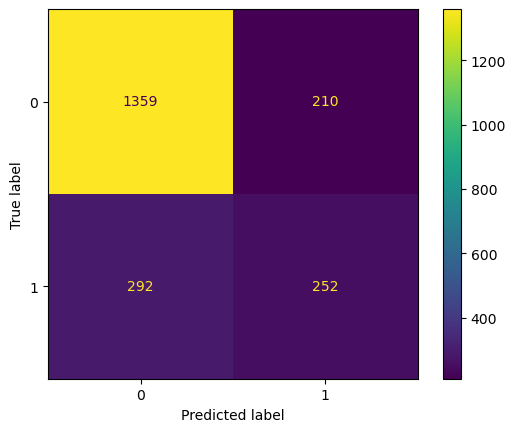

Accuracy: 0.7624230951254141
Recall: 0.4632352941176471
Precision: 0.5454545454545454
F1 Score: 0.5009940357852882


In [49]:
# Visualizing the Confusion Matrix and the metrics

cm = confusion_matrix(y_test, y_rf_pred)
ConfusionMatrixDisplay(cm, display_labels=rf_model.classes_).plot(cmap='viridis') 
plt.show()


# Calculating metrics
rf_accuracy = accuracy_score(y_test, y_rf_pred)
rf_recall = recall_score(y_test, y_rf_pred)
rf_precision = precision_score(y_test, y_rf_pred)
rf_f1 = f1_score(y_test, y_rf_pred)

# Displaying the metrics
print("Accuracy:", rf_accuracy)
print("Recall:", rf_recall)
print("Precision:", rf_precision)
print("F1 Score:", rf_f1)



In [50]:

models_performance = {
    'Linear Regression': ['N/A', lr_rmse, 'N/A', 'N/A'],  # RMSE instead 
    'Logistic Regression': [log_accuracy, log_recall, log_precision, log_f1],
    'Multiple Logistic Regression': [multi_log_accuracy, multi_log_recall, multi_log_precision, multi_log_f1],
    'Decision Tree': [dt_accuracy, dt_recall, dt_precision, dt_f1],
    'Random Forest': [rf_accuracy, rf_recall, rf_precision, rf_f1]
}

# Convert the dictionary to a DataFrame
models_comp_df = pd.DataFrame(models_performance, index=['Accuracy', 'Recall/Precision', 'F1/RMSE', 'Error'])

# Transpose the DataFrame to have models as rows
models_comp_df = models_comp_df.T

print("Models performance comparison:")
print(models_comp_df)


Models performance comparison:
                             Accuracy Recall/Precision F1/RMSE Error
Linear Regression                 N/A           29.079     N/A   N/A
Logistic Regression             0.743            0.000   0.000 0.000
Multiple Logistic Regression    0.791            0.434   0.609 0.507
Decision Tree                   0.762            0.310   0.529 0.391
Random Forest                   0.762            0.463   0.545 0.501


In [51]:
# Multiple Logistic Regression seemed to perform the best of the models .The F1 score showed the best balance and overall accuracy. Other models may work better 